In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("training_set.tsv", sep='\t', encoding="ISO-8859-1")
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,2,Certain materials being removed from libraries...,4,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Write a persuasive essay to a newspaper reflec...,1,2,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,Do you think that libraries should remove cert...,2,3,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,"In @DATE1's world, there are many things found...",4,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,In life you have the 'offensive things'. The l...,4,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1800.00000,1800.0,1800.000000,1800.000000,0.0,1800.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,900.50000,2.0,3.415556,3.436667,NaN,3.415556,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,519.75956,0.0,0.774512,0.775808,NaN,0.774512,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,2.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,450.75000,2.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,900.50000,2.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1350.25000,2.0,4.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1800.00000,2.0,6.000000,6.000000,NaN,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        1800 non-null   int64  
 1   essay_set       1800 non-null   int64  
 2   essay           1800 non-null   object 
 3   rater1_domain1  1800 non-null   int64  
 4   rater2_domain1  1800 non-null   int64  
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   1800 non-null   int64  
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   0 non-null      float64
 11  rater1_trait2   0 non-null      float64
 12  rater1_trait3   0 non-null      float64
 13  rater1_trait4   0 non-null      float64
 14  rater1_trait5   0 non-null      float64
 15  rater1_trait6   0 non-null      float64
 16  rater2_trait1   0 non-null      float64
 17  rater2_trait2   0 non-null      f

In [5]:
df.shape

(1800, 28)

In [6]:
df.isnull().sum()

essay_id             0
essay_set            0
essay                0
rater1_domain1       0
rater2_domain1       0
rater3_domain1    1800
domain1_score        0
rater1_domain2    1800
rater2_domain2    1800
domain2_score     1800
rater1_trait1     1800
rater1_trait2     1800
rater1_trait3     1800
rater1_trait4     1800
rater1_trait5     1800
rater1_trait6     1800
rater2_trait1     1800
rater2_trait2     1800
rater2_trait3     1800
rater2_trait4     1800
rater2_trait5     1800
rater2_trait6     1800
rater3_trait1     1800
rater3_trait2     1800
rater3_trait3     1800
rater3_trait4     1800
rater3_trait5     1800
rater3_trait6     1800
dtype: int64

In [7]:
df.dropna(axis=1, inplace=True)

In [8]:
df.shape

(1800, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,2,Certain materials being removed from libraries...,4,4,4
1,2,2,Write a persuasive essay to a newspaper reflec...,1,2,1
2,3,2,Do you think that libraries should remove cert...,2,3,2
3,4,2,"In @DATE1's world, there are many things found...",4,4,4
4,5,2,In life you have the 'offensive things'. The l...,4,4,4


In [10]:
df['essay_set'].value_counts()

2    1800
Name: essay_set, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1', 'rater2_domain1'], inplace=True, axis=1)

In [12]:
df.shape

(1800, 4)

In [13]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,2,Certain materials being removed from libraries...,4
1,2,2,Write a persuasive essay to a newspaper reflec...,1
2,3,2,Do you think that libraries should remove cert...,2
3,4,2,"In @DATE1's world, there are many things found...",4
4,5,2,In life you have the 'offensive things'. The l...,4


In [14]:
min(df['domain1_score'])

1

In [15]:
max(df['domain1_score'])

6

In [16]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.302466
dtype: float64

In [17]:
df.kurtosis()

essay_id        -1.200000
essay_set        0.000000
domain1_score    0.606167
dtype: float64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_5147/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

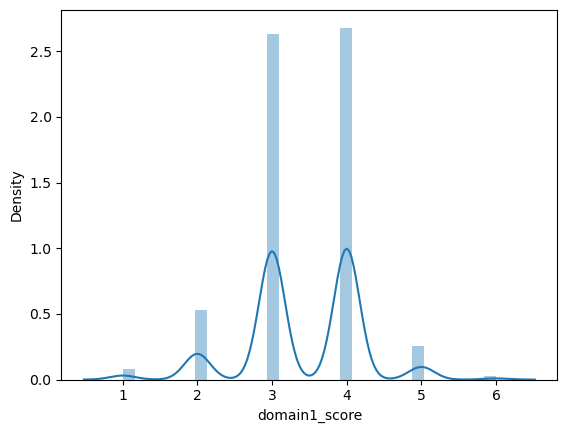

In [18]:
sns.distplot(df['domain1_score'])

In [19]:
df[df['essay_set']==2]['domain1_score']

0       4
1       1
2       2
3       4
4       4
       ..
1795    3
1796    3
1797    2
1798    3
1799    3
Name: domain1_score, Length: 1800, dtype: int64

In [20]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x: normalize(x['domain1_score'], min_range[x['essay_set']-1], max_range[x['essay_set']-1]), axis=1)

In [21]:
df['final_score']

0       6
1       0
2       2
3       6
4       6
       ..
1795    4
1796    4
1797    2
1798    4
1799    4
Name: final_score, Length: 1800, dtype: int64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_5147/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

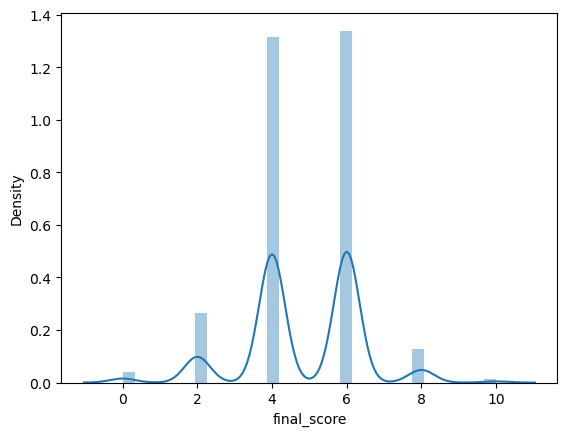

In [22]:
sns.distplot(df['final_score'])

In [23]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.302466
final_score     -0.302466
dtype: float64

In [24]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,2,Certain materials being removed from libraries...,4,6
1,2,2,Write a persuasive essay to a newspaper reflec...,1,0
2,3,2,Do you think that libraries should remove cert...,2,2
3,4,2,"In @DATE1's world, there are many things found...",4,6
4,5,2,In life you have the 'offensive things'. The l...,4,6


In [25]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,1800.00000,1800.0,1800.000000,1800.000000
mean,900.50000,2.0,3.415556,4.831111
std,519.75956,0.0,0.774512,1.549024
min,1.00000,2.0,1.000000,0.000000
25%,450.75000,2.0,3.000000,4.000000
50%,900.50000,2.0,3.000000,4.000000
75%,1350.25000,2.0,4.000000,6.000000
max,1800.00000,2.0,6.000000,10.000000


In [26]:
df.drop('domain1_score', axis=1, inplace=True)

In [27]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,2,Certain materials being removed from libraries...,6
1,2,2,Write a persuasive essay to a newspaper reflec...,0
2,3,2,Do you think that libraries should remove cert...,2
3,4,2,"In @DATE1's world, there are many things found...",6
4,5,2,In life you have the 'offensive things'. The l...,6


**Pre-Processing**

In [28]:
def clean_essay(essay):
    x = []
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x: clean_essay(x))

In [29]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x: remove_stop_words(x))

In [30]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]", "", essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x: remove_puncs(x))

In [31]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,2,Certain materials being removed from libraries...,6,Certain materials removed libraries books mus...
1,2,2,Write a persuasive essay to a newspaper reflec...,0,Write persuasive essay newspaper reflecting vi...
2,3,2,Do you think that libraries should remove cert...,2,Do think libraries remove certain materials sh...
3,4,2,"In world, there are many things found offensiv...",6,In world many things found offensive Everyon...
4,5,2,In life you have the 'offensive things'. The l...,6,In life offensive things The little stuff ge...


In [32]:
def sent2word(x):
    x = re.sub("[^A-Za-z0-9]", " ", x)
    words = nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words = []
    for i in raw:
        if len(i) > 0:
            final_words.append(sent2word(i))
    return final_words

def noOfWords(essay):
    count = 0
    for i in essay2word(essay):
        count = count + len(i)
    return count

def noOfChar(essay):
    count = 0
    for i in essay2word(essay):
        for j in i:
            count = count + len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay) / noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adverb_count = 0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if pos_tag[0] == 'N':
                noun_count += 1
            elif pos_tag[0] == 'V':
                verb_count += 1
            elif pos_tag[0] == 'J':
                adj_count += 1
            elif pos_tag[0] == 'R':
                adverb_count += 1
    return noun_count, verb_count, adj_count, adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay = essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]", " ", essay)
    new_essay = re.sub("[0-9]", "", new_essay)
    count = 0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count += 1
    return count

In [33]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,2,Certain materials being removed from libraries...,6,Certain materials removed libraries books mus...
1,2,2,Write a persuasive essay to a newspaper reflec...,0,Write persuasive essay newspaper reflecting vi...
2,3,2,Do you think that libraries should remove cert...,2,Do think libraries remove certain materials sh...
3,4,2,"In world, there are many things found offensiv...",6,In world many things found offensive Everyon...
4,5,2,In life you have the 'offensive things'. The l...,6,In life offensive things The little stuff ge...


**Prep for ML**

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ibsrinivas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [36]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0', inplace=True, axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,2,Certain materials being removed from libraries...,6,Certain materials removed libraries books mus...,1999,470,17,4.253191,15,112,95,33,32
1,2,2,Write a persuasive essay to a newspaper reflec...,0,Write persuasive essay newspaper reflecting vi...,636,167,3,3.808383,11,35,46,15,6
2,3,2,Do you think that libraries should remove cert...,2,Do think libraries remove certain materials sh...,864,222,15,3.891892,5,52,45,17,15
3,4,2,"In world, there are many things found offensiv...",6,In world many things found offensive Everyon...,2115,468,31,4.519231,3,98,122,27,30
4,5,2,In life you have the 'offensive things'. The l...,6,In life offensive things The little stuff ge...,1814,429,35,4.228438,23,107,93,29,30


In [37]:
prep_df.shape

(1800, 14)

In [38]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis=1)
y_full = prep_df['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)